# Vector and Matrix Operations with NumPy and OpenCV

## 1. Basic Vector and Matrix Operations

### 1.1. Length of a Vector

In [46]:
import numpy as np

def compute_vector_length(vector):
    len_of_vector = np.linalg.norm(vector)
    return len_of_vector

In [47]:
# Test the function
vector = np.array([-2, 4, 9, 21])
result = compute_vector_length(vector)
print(f"Length of vector: {round(result, 2)}")

Length of vector: 23.28


### 1.2. Dot Product

In [48]:
def compute_dot_product(vector1, vector2):
    result = np.dot(vector1, vector2)
    return result

In [49]:
# Test the function
v1 = np.array([0, 1, -1, 2])
v2 = np.array([2, 5, 1, 0])
result = compute_dot_product(v1, v2)
print(f"Dot product: {result}")

Dot product: 4


### 1.3. Matrix-Vector Multiplication

In [50]:
def matrix_multi_vector(matrix, vector):
    result = matrix @ vector
    return result

In [51]:
# Test the function
m = np.array([[-1, 1, 1], [0, -4, 9]])
v = np.array([0, 2, 1])
result = matrix_multi_vector(m, v)
print(f"Matrix-vector multiplication result:\n{result}")

Matrix-vector multiplication result:
[3 1]


### 1.4. Matrix-Matrix Multiplication

In [52]:
def matrix_multi_matrix(matrix1, matrix2):
    result = matrix1 @ matrix2
    return result

In [53]:
# Test the function
m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3], [6, 1], [0, -1]])
result = matrix_multi_matrix(m1, m2)
print(f"Matrix-matrix multiplication result:\n{result}")

Matrix-matrix multiplication result:
[[  6  -1]
 [-16 -10]]


### 1.5. Matrix Inverse

Given matrix $A = \begin{bmatrix}-2 & 6 \\ 8 & -4\end{bmatrix}$

*Step 1*: Calculate the determinant
$\det(A) = -2 \times (-4) - (6 \times 8) = 8 - 48 = -40$

*Step 2*: Calculate the adjugate matrix
$\text{adj}(A) = \begin{bmatrix}-4 & -6 \\ -8 & -2\end{bmatrix}$

*Step 3*: Calculate the inverse
$A^{-1} = \dfrac{1}{\det(A)} \times \text{adj}(A)$
$= \dfrac{-1}{40} \times \begin{bmatrix}-4 & -6 \\ -8 & -2\end{bmatrix}$
$= \begin{bmatrix}0.1 & 0.15 \\ 0.2 & 0.05\end{bmatrix}$

In [54]:
def inverse_matrix(matrix):
    result = np.linalg.inv(matrix)
    return result

In [55]:
# Test the function
m1 = np.array([[-2, 6], [8, -4]])
result = inverse_matrix(m1)
print(f"Inverse matrix:\n{result}")

Inverse matrix:
[[0.1  0.15]
 [0.2  0.05]]


## 2. Eigenvectors and Eigenvalues

Given matrix $A = \begin{bmatrix}0.9 & 0.2 \\ 0.1 & 0.8\end{bmatrix}$

*Step 1*: Find eigenvalues.

$\det(A - \lambda I) = \begin{vmatrix}
0.9 - \lambda & 0.2 \\
0.1 & 0.8 - \lambda
\end{vmatrix} = 0$

$\Leftrightarrow (0.9 - \lambda)(0.8 - \lambda) - 0.02 = 0$

$\Leftrightarrow \lambda^2 - 1.7\lambda + 0.7 = 0$

Solving this quadratic equation:
$\lambda_1 \approx 1.0$,
$\lambda_2 \approx 0.7$

*Step 2*: Find eigenvectors.

For $\lambda_1 = 1.0$:

$$(A - \lambda_1I)v = 0\\
\begin{bmatrix} -0.1 & 0.2 \\ 0.1 & -0.2 \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix} =
\begin{bmatrix} 0 \\ 0 \end{bmatrix}$$

$\Rightarrow v_1 \approx [0.89442719, 0.4472136]$

For $\lambda_2 = 0.7$:

$$(A - \lambda_2I)v = 0 \\
\begin{bmatrix} 0.2 & 0.2 \\ 0.1 & 0.1 \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix} =
\begin{bmatrix} 0 \\ 0 \end{bmatrix}$$

$\Rightarrow v_2 \approx [-0.70710678, 0.70710678]$

*Step 3*: Normalize eigenvectors

$v_{1\_normalized} = \dfrac{v_1}{\|v_1\|} \approx [0.89442719, 0.4472136]\\
v_{2\_normalized} = \dfrac{v_2}{\|v_2\|} \approx [-0.70710678, 0.70710678]$

In [56]:
def compute_eigenvalues_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    # Normalize eigenvectors
    normalized_eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

    return eigenvalues, normalized_eigenvectors

In [57]:
# Test the function
matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print(f"Eigenvalues:\n{eigenvalues}")
print(f"Normalized Eigenvectors:\n{eigenvectors}")

Eigenvalues:
[1.  0.7]
Normalized Eigenvectors:
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


## 3. Cosine Similarity

Given vectors:
$x = [1, 2, 3, 4]$,
$y = [1, 0, 3, 0]$

*Step 1*: Calculate the dot product

$x \cdot y = 1 \times 1 + 2 \times 0 + 3 \times 3 + 4 \times 0 = 10$

*Step 2*: Calculate the magnitudes

$\|x\| = \sqrt{1^2 + 2^2 + 3^2 + 4^2} = \sqrt{30} \approx 5.477\\
\|y\| = \sqrt{1^2 + 0^2 + 3^2 + 0^2} = \sqrt{10} \approx 3.162$

*Step 3*: Calculate Cosine Similarity

$cs(x, y) = \dfrac{x \cdot y}{\|x\| \times \|y\|}$
$= \dfrac{10}{5.477 \times 3.162}$
$\approx 0.577$

In [58]:
def compute_cosine(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)

    cos_sim = dot_product / (norm_v1 * norm_v2)
    return cos_sim

In [59]:
# Test the function
x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x, y)
print(f"Cosine similarity: {round(result, 3)}")

Cosine similarity: 0.577


## 4. Background Subtraction

### 4.1 Resize Input Images

In [60]:
import cv2

bg1_image = cv2.imread('GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

### 4.2 Compute Difference

In [61]:
def compute_difference(bg_img, input_img):
    # Convert images to HSV color space
    bg_hsv = cv2.cvtColor(bg_img, cv2.COLOR_BGR2HSV)
    input_hsv = cv2.cvtColor(input_img, cv2.COLOR_BGR2HSV)
    
    # Calculate the difference between color channels
    diff = cv2.absdiff(input_hsv, bg_hsv)
    
    # Get the V (Value) channel from the difference image
    difference_single_channel = diff[:,:,2]
    
    return difference_single_channel

### 4.3 Compute Binary Mask

In [62]:
def compute_binary_mask(difference_single_channel):
    # Apply threshold to create binary mask
    _, binary_mask = cv2.threshold(difference_single_channel, 30, 255, cv2.THRESH_BINARY)
    
    # Apply morphological operations to remove noise
    kernel = np.ones((5,5), np.uint8)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
    
    return binary_mask

### 4.4 Replace Background

In [63]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)
    binary_mask = compute_binary_mask(difference_single_channel)
    
    # Create 3-channel mask
    mask_3channel = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)
    
    # Apply mask
    foreground = cv2.bitwise_and(ob_image, mask_3channel)
    background = cv2.bitwise_and(bg2_image, cv2.bitwise_not(mask_3channel))
    
    # Combine foreground and background
    output = cv2.add(foreground, background)
    
    return output

### 4.5 Display Results

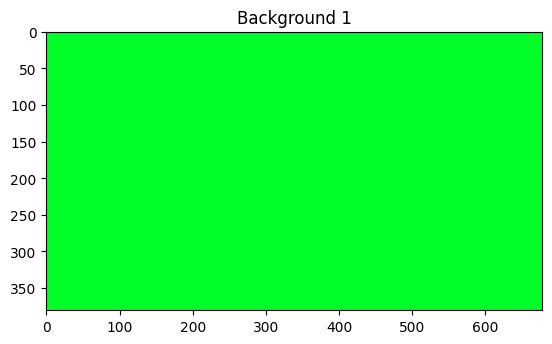

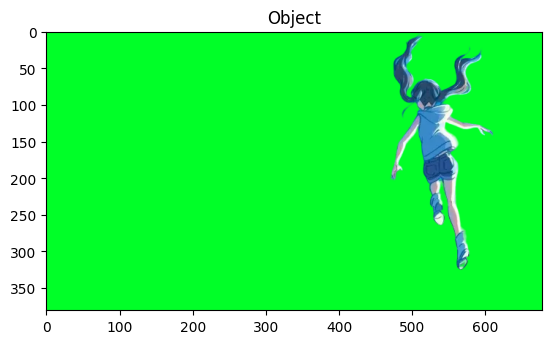

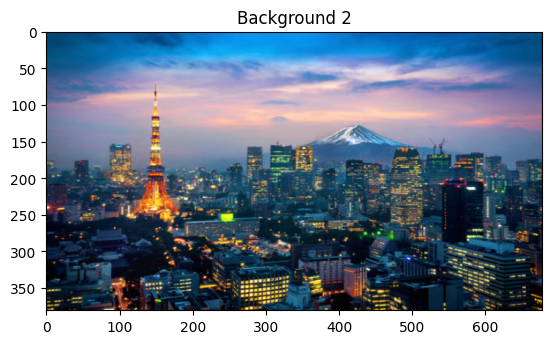

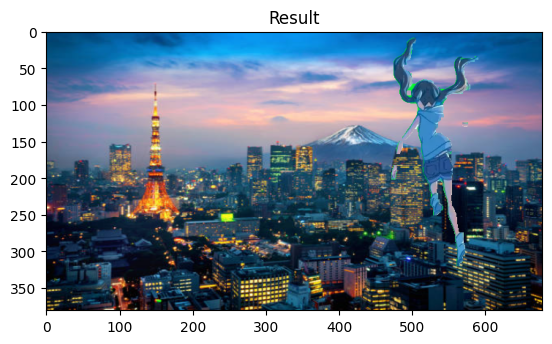

In [73]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(bg1_image, cv2.COLOR_BGR2RGB))
plt.title('Background 1')
plt.show()

plt.imshow(cv2.cvtColor(ob_image, cv2.COLOR_BGR2RGB))
plt.title('Object')
plt.show()

plt.imshow(cv2.cvtColor(bg2_image, cv2.COLOR_BGR2RGB))
plt.title('Background 2')
plt.show()

result = replace_background(bg1_image, bg2_image, ob_image)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Result')
plt.show()